In [1]:
import sys
sys.path.insert(0,  '../src/imputation/')
import data_preparation
import fbprophetconfig
import fbprophet
import pandas as pd

In [2]:
data_config, var_config, time_config = fbprophetconfig.data, fbprophetconfig.variables, fbprophetconfig.timestamps
df = data_preparation._primary_data_preprocessing(data_config, var_config,
                                                  data_in_path='../data_in/')    

55:nc_read_series: Reading netCDF file ../data_in/Calperum_L3.nc
113:nc_read_series: Got data from 2010-08-01 00:00:00 to 2015-10-21 07:30:00
28:_primary_data_preprocessing:Loading file: ../data_in/Calperum_L3.nc
35:_primary_data_preprocessing:Loading file: ../data_in/Calperum_ACCESS.nc
55:nc_read_series: Reading netCDF file ../data_in/Calperum_ACCESS.nc
113:nc_read_series: Got data from 2011-01-01 09:30:00 to 2018-05-01 09:00:00
35:_primary_data_preprocessing:Loading file: ../data_in/Calperum_BIOS2.nc
55:nc_read_series: Reading netCDF file ../data_in/Calperum_BIOS2.nc
113:nc_read_series: Got data from 2000-01-01 00:30:00 to 2014-03-01 00:00:00


In [3]:
df.head()

,Ta,DateTime,ACCESS_Ta_00,ACCESS_Ta_01,ACCESS_Ta_02,ACCESS_Ta_10,ACCESS_Ta_11,ACCESS_Ta_12,ACCESS_Ta_20,ACCESS_Ta_21,ACCESS_Ta_22,BIOS2_Ta
0,13.065528,2010-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.453583
1,13.400839,2010-08-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.323608
2,10.763525,2010-08-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.196259
3,10.242102,2010-08-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.071503
4,10.151757,2010-08-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.949158


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91552 entries, 0 to 91551
Data columns (total 12 columns):
Ta              86456 non-null float64
DateTime        91552 non-null datetime64[ns]
ACCESS_Ta_00    80989 non-null float64
ACCESS_Ta_01    80989 non-null float64
ACCESS_Ta_02    80989 non-null float64
ACCESS_Ta_10    80989 non-null float64
ACCESS_Ta_11    80989 non-null float64
ACCESS_Ta_12    80989 non-null float64
ACCESS_Ta_20    80989 non-null float64
ACCESS_Ta_21    80989 non-null float64
ACCESS_Ta_22    80989 non-null float64
BIOS2_Ta        62785 non-null float64
dtypes: datetime64[ns](1), float64(11)
memory usage: 9.1 MB


In [5]:
begindate = time_config['begin_date']
enddate = time_config['end_date']

print(begindate, enddate)

2013-01-01 00:00:00 2013-01-07 23:59:59


In [6]:
dftrain = df[(df['DateTime']<begindate) & (df['DateTime']>='2011-01-01 00:00:00')]
dffuture = df[(df['DateTime']>=begindate) & (df['DateTime']<enddate)]

In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35088 entries, 7344 to 42431
Data columns (total 12 columns):
Ta              35076 non-null float64
DateTime        35088 non-null datetime64[ns]
ACCESS_Ta_00    32356 non-null float64
ACCESS_Ta_01    32356 non-null float64
ACCESS_Ta_02    32356 non-null float64
ACCESS_Ta_10    32356 non-null float64
ACCESS_Ta_11    32356 non-null float64
ACCESS_Ta_12    32356 non-null float64
ACCESS_Ta_20    32356 non-null float64
ACCESS_Ta_21    32356 non-null float64
ACCESS_Ta_22    32356 non-null float64
BIOS2_Ta        35088 non-null float64
dtypes: datetime64[ns](1), float64(11)
memory usage: 3.5 MB


In [8]:
dfprophet = pd.DataFrame({'ds':dftrain[var_config['tvar']], 'y':dftrain[var_config['yvar']]})

In [9]:
m = fbprophet.Prophet(yearly_seasonality=True)
m.fit(dfprophet)

C:\Users\22372102\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\22372102\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
future = pd.DataFrame({'ds':dffuture[var_config['tvar']]})
future.tail()

,ds
42763,2013-01-07 21:30:00
42764,2013-01-07 22:00:00
42765,2013-01-07 22:30:00
42766,2013-01-07 23:00:00
42767,2013-01-07 23:30:00


In [11]:
forecast = m.predict(future)
predicted = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [12]:
#fig1 = m.plot(forecast)

In [13]:
predicted.head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01 00:00:00,21.553820,16.258473,26.782573
1,2013-01-01 00:30:00,21.167989,15.917128,26.250863
2,2013-01-01 01:00:00,20.803247,15.200262,26.168094
3,2013-01-01 01:30:00,20.463844,14.903469,25.730338
4,2013-01-01 02:00:00,20.146198,15.045010,25.577634


In [14]:
dffuture.head()

,Ta,DateTime,ACCESS_Ta_00,ACCESS_Ta_01,ACCESS_Ta_02,ACCESS_Ta_10,ACCESS_Ta_11,ACCESS_Ta_12,ACCESS_Ta_20,ACCESS_Ta_21,ACCESS_Ta_22,BIOS2_Ta
42432,22.37896,2013-01-01 00:00:00,21.818756,22.029694,22.084381,21.435944,21.560944,21.623444,21.037506,21.146881,21.185944,17.898865
42433,20.58474,2013-01-01 00:30:00,20.943756,21.193756,21.178131,20.600006,20.709381,20.709381,20.225006,20.318756,20.271881,17.440918
42434,18.69939,2013-01-01 01:00:00,20.287506,20.545319,20.576569,20.060944,20.217194,20.232819,19.756256,19.881256,19.865631,17.000885
42435,18.60999,2013-01-01 01:30:00,19.631256,19.896881,19.975006,19.521881,19.725006,19.756256,19.287506,19.443756,19.459381,16.582977
42436,18.44123,2013-01-01 02:00:00,18.998444,19.334381,19.498444,18.810944,19.053131,19.146881,18.545319,18.732819,18.764069,16.181274


In [15]:
ypredicted = predicted['yhat']
yexpected = dffuture[var_config['yvar']]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

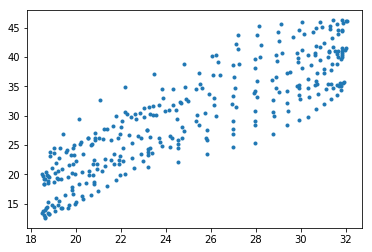

In [17]:
plt.plot(ypredicted, yexpected, '.')